<a href="https://colab.research.google.com/github/iiserkbikram/Evaluating-Machine-Learning-Models/blob/main/Evaluating_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training, Validation and Test sets**

**Hold-out validation**

In [24]:
num_validation_samples = 10000

# Shuffling the data
np.random.suffle(data)

# Define the validation set
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

# Define the training set
training_data = data[:]

# Train the model on the training data, and evaluate it on the validation data
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# At this point you can tune your model
# retrain it, evaluate it, tune it again...

model = get_model()
model.train(np.concatenate([training_data,
                            validation_data]))
test_score = model.evaluate(test_data)

# Once you have tuned your hyperparameters, it's common to train your final model form scratch on all non-test data available.

**K-fold cross-validation**

In [25]:
k = 4 
num_validation_samples = len(data)//k

np.random.shuffle(data)

validation_scores = []
# Select the valdation set 
for fold in range(k):
  validation_data = data[num_validation_samples * fold: num_validation_samples * (fold + 1)]
  training_data = data[:num_validation_samples * fold] + data[num_validation_samples * (fold + 1):]

# Create a brand new instance of the model(untrained)
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)
model_scores.append(validation_score)

# Validatin score: Average of the validation scores of the k folds
validation_score = np.average(validation_scores)

# Train the final model on all non test data avilable 
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

# **Overfitting and Underfitting**

In [26]:
# Let's use the example of IMDB data sets 
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 
# num_words=10000 means we will only keep the top 10,000 most frequently occuring words in the training data



# Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences),dimension)) # creates an all zero matrix of shape(len(sequences),dimesion)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1 # Sets specific indices of results[i] to 1s
  return results

x_train = vectorize_sequences(train_data) # vectorizes training data
x_test = vectorize_sequences(test_data) # vectorizes test data

# Similarly let's vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")



# Setting aside a validatioin set
x_val = x_train[:10000]
partial_x_train =  x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# Original model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


# Training the Model
model.compile (optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = 'accuracy')


history = model.fit(partial_x_train,partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5060 - accuracy: 0.7851 - val_loss: 0.3797 - val_accuracy: 0.8727
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3030 - accuracy: 0.9028 - val_loss: 0.3100 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2235 - accuracy: 0.9285 - val_loss: 0.2819 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1715 - accuracy: 0.9440 - val_loss: 0.2765 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1384 - accuracy: 0.9555 - val_loss: 0.3057 - val_accuracy: 0.8786
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1181 - accuracy: 0.9641 - val_loss: 0.3012 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0973 - accuracy: 0.9704 - val_loss: 0.3111 - val_accuracy: 0.8835
Epoch 8/20
30

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

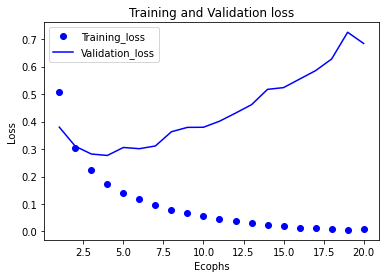

In [28]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict_original = history.history
loss_values = history_dict_original['loss']
val_loss_values = history_dict_original['val_loss']

epochs = 20
epochs = range(1,epochs + 1)

plt.plot(epochs, loss_values,'bo', label="Training_loss")
plt.plot(epochs,val_loss_values,"b",label="Validation_loss")
plt.title("Training and Validation loss")
plt.xlabel("Ecophs")
plt.ylabel("Loss")
plt.legend()

plt.show()

This is our original validation loss graph. We will use it as reference to compare it with others by changing some parameter. 

**Reducing the Network size**

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.6172 - accuracy: 0.7455 - val_loss: 0.5511 - val_accuracy: 0.8165
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.4851 - accuracy: 0.8729 - val_loss: 0.4666 - val_accuracy: 0.8414
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3859 - accuracy: 0.8986 - val_loss: 0.3814 - val_accuracy: 0.8767
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3163 - accuracy: 0.9137 - val_loss: 0.3389 - val_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2674 - accuracy: 0.9226 - val_loss: 0.3118 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2318 - accuracy: 0.9321 - val_loss: 0.2935 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2046 - accuracy: 0.9381 - val_loss: 0.2836 - val_accuracy: 0.8886
Epoch 8/20
30

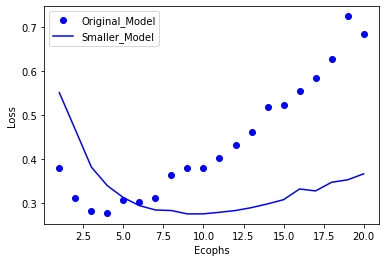

In [29]:
# Lets replace with smaller network (lower Capacity)
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


# Training the Model
model.compile (optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = 'accuracy')


history = model.fit(partial_x_train,partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))


# Plotting the Original and lower capacity model validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values_ref = history_dict_original['val_loss']
val_loss_values = history_dict['val_loss']

epochs = 20
epochs = range(1,epochs + 1)

plt.plot(epochs, loss_values_ref,'bo', label="Original_Model")
plt.plot(epochs,val_loss_values,"b",label="Smaller_Model")
#plt.title("Training and Validation loss")
plt.xlabel("Ecophs")
plt.ylabel("Loss")
plt.legend()

plt.show()



Smaller network starts overfitting later than the reference network and it performance degrades more slowely once it starts overfitting.

**Increasing the Network size**

Epoch 1/20
30/30 [==============================] - 10s 310ms/step - loss: 0.5385 - accuracy: 0.7623 - val_loss: 0.2869 - val_accuracy: 0.8849
Epoch 2/20
30/30 [==============================] - 9s 294ms/step - loss: 0.2471 - accuracy: 0.9035 - val_loss: 0.2735 - val_accuracy: 0.8881
Epoch 3/20
30/30 [==============================] - 9s 293ms/step - loss: 0.1512 - accuracy: 0.9411 - val_loss: 0.3128 - val_accuracy: 0.8774
Epoch 4/20
30/30 [==============================] - 9s 292ms/step - loss: 0.0749 - accuracy: 0.9758 - val_loss: 0.4046 - val_accuracy: 0.8762
Epoch 5/20
30/30 [==============================] - 9s 292ms/step - loss: 0.1076 - accuracy: 0.9761 - val_loss: 0.3148 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 9s 290ms/step - loss: 0.0058 - accuracy: 0.9997 - val_loss: 0.4875 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 9s 291ms/step - loss: 6.5445e-04 - accuracy: 1.0000 - val_loss: 0.6057 - val_accuracy: 0.8881
E

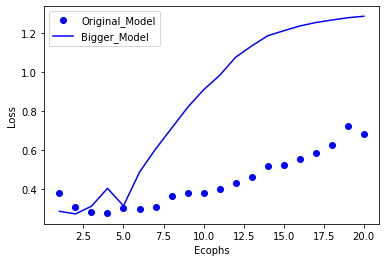

In [31]:
# Version of model with higher Capacity
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


# Training the Model
model.compile (optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = 'accuracy')


history = model.fit(partial_x_train,partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

# Plotting the Original and higher capacity model validation loss
import matplotlib.pyplot as plt

history_dict = history.history
val_loss_values_ref = history_dict_original['val_loss']
val_loss_values = history_dict['val_loss']

epochs = 20
epochs = range(1,epochs + 1)

plt.plot(epochs, val_loss_values_ref,'bo', label="Original_Model")
plt.plot(epochs,val_loss_values,"b",label="Bigger_Model")
#plt.title("Training and Validation loss")
plt.xlabel("Ecophs")
plt.ylabel("Loss")
plt.legend()

plt.show()



The Bigger network starts overfitting almost immediately, after just one epoch, and it overfits much more severly. 

**Adding weight regularization**

L1 regularization : The cost added is the proportional to the absolute value of the weight coefficients.\
L2 regularization : The cost added is the proportional to the square of the value of the weight coefficients.
 This is also called weight decay in the contex of neural networks. 

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5308 - accuracy: 0.7995 - val_loss: 0.4346 - val_accuracy: 0.8464
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3372 - accuracy: 0.9043 - val_loss: 0.4076 - val_accuracy: 0.8469
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2770 - accuracy: 0.9201 - val_loss: 0.3516 - val_accuracy: 0.8766
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2389 - accuracy: 0.9379 - val_loss: 0.3424 - val_accuracy: 0.8800
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2235 - accuracy: 0.9419 - val_loss: 0.3475 - val_accuracy: 0.8803
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2066 - accuracy: 0.9493 - val_loss: 0.3512 - val_accuracy: 0.8793
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1980 - accuracy: 0.9542 - val_loss: 0.3619 - val_accuracy: 0.8813
Epoch 8/20
30

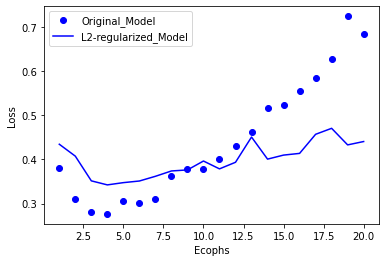

In [32]:
# Version of model with Regularization
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.L2(0.001),
                       activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer = regularizers.L2(0.001),
                       activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


# Training the Model
model.compile (optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = 'accuracy')


history = model.fit(partial_x_train,partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

# Plotting the Original and L2 regularized validation loss
import matplotlib.pyplot as plt

history_dict = history.history
val_loss_values_ref = history_dict_original['val_loss']
val_loss_values = history_dict['val_loss']

epochs = 20
epochs = range(1,epochs + 1)

plt.plot(epochs, val_loss_values_ref,'bo', label="Original_Model")
plt.plot(epochs,val_loss_values,"b",label="L2-regularized_Model")
#plt.title("Training and Validation loss")
plt.xlabel("Ecophs")
plt.ylabel("Loss")
plt.legend()

plt.show()



The model with regularization has become much more resistance to the overfitting than the reference model, even though both the models same number of parameters

**Adding Dropout**

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.6662 - accuracy: 0.6395 - val_loss: 0.5407 - val_accuracy: 0.8410
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5425 - accuracy: 0.7807 - val_loss: 0.4400 - val_accuracy: 0.8727
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4634 - accuracy: 0.8331 - val_loss: 0.3822 - val_accuracy: 0.8841
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4026 - accuracy: 0.8691 - val_loss: 0.3488 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3665 - accuracy: 0.8853 - val_loss: 0.3357 - val_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3379 - accuracy: 0.8966 - val_loss: 0.3299 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3090 - accuracy: 0.9109 - val_loss: 0.3350 - val_accuracy: 0.8877
Epoch 8/20
30

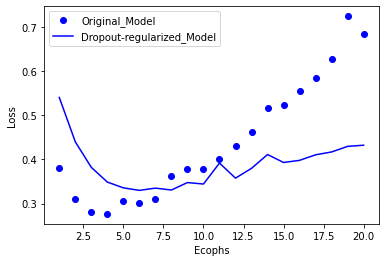

In [33]:
# Version of model with Drop-out Regularization
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.L2(0.001),
                       activation = 'relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,kernel_regularizer = regularizers.L2(0.001),
                       activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))


# Training the Model
model.compile (optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = 'accuracy')


history = model.fit(partial_x_train,partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

# Plotting the Original and Drop-out regularized validation loss
import matplotlib.pyplot as plt

history_dict = history.history
val_loss_values_ref = history_dict_original['val_loss']
val_loss_values = history_dict['val_loss']

epochs = 20
epochs = range(1,epochs + 1)

plt.plot(epochs, val_loss_values_ref,'bo', label="Original_Model")
plt.plot(epochs,val_loss_values,"b",label="Dropout-regularized_Model")
#plt.title("Training and Validation loss")
plt.xlabel("Ecophs")
plt.ylabel("Loss")
plt.legend()

plt.show()



**To summarise the most common ways to prevent overfitting in neural networks:**\
--> Get more training data\
--> Reduce the capacity of network\
--> Add weight regularization\
--> Add dropout